# 💬 TMCD – Trabalho Final
## Análise de Sentimentos em Reviews de Filmes

### 👥 Grupo Trab-grupo-30
- **Rafael Alexandre Dias Andorinha**, nº 131000  
- **Pedro Fonte Santa**, nº 105306  

---

📅 **Data de entrega:** 26 de abril  

📊 **Objetivo deste script:**
Este Notebook corresponde à Tarefa 2.3 do trabalho.

Nesta fase, é implementado um classificador de sentimentos simples baseado num léxico, utilizando o NRC Word-Emotion Association Lexicon (EmoLex), previamente tratado para conter apenas as colunas relativas à polaridade (positivo/negativo).

O objetivo é classificar automaticamente o conjunto de dados de teste, atribuindo uma polaridade com base na contagem de palavras positivas e negativas presentes em cada texto.

Foram realizadas três experiências distintas:
- A primeira, utilizando apenas texto em minúsculas (lowercase).
- A segunda, adicionando técnicas básicas de pré-processamento (remoção de pontuação e de stopwords).
- A terceira, para alem de todas as técnicas anteriores ainda inclui tratamento simples de negação.

O desempenho foi avaliado com base nas métricas de accuracy, precisão, recall e F1-score. Esta abordagem visa servir de base comparativa para técnicas mais avançadas a explorar nas próximas etapas.


---

# 🗂️ Dataset: IMDB Reviews

### 2.3 Preparação de dados e aplicação de um léxico de sentimentos

In [ ]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
nltk.download('punkt')  # Para tokenização de palavras
nltk.download('stopwords')
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package punkt to /Users/pedrofs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrofs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Função para carregar o léxico NRC-EmoLex
def carregar_lexico():
    nrc = pd.read_csv('../dataset/NCR-lexicon.csv')
    # Converter para sets de acesso instantâneo
    lexico_pos = set(nrc[nrc['positive'] == 1]['word'])
    lexico_neg = set(nrc[nrc['negative'] == 1]['word'])
    return lexico_pos, lexico_neg

In [43]:
# Lista de stopwords em inglês
stop_words = set(stopwords.words('english'))
# Lista de pontuação
pontuacao = set(string.punctuation)

In [44]:
# Função para pré-processar o texto
def preprocessar_texto(texto):
    # Converter para lowercase
    texto = texto.lower()
    # Tokenizar as palavras sem depender de 'punkt'
    palavras = wordpunct_tokenize(texto)
    # Remover pontuação e stopwords
    palavras_filtradas = [
        p for p in palavras if p not in pontuacao and p not in stop_words
    ]
    return palavras_filtradas

## 🧠 Experiência1: Classificar sem tratamento de negação

In [45]:
# Classificador binário com desempate forçado para 'neg'
def classificar_sentimento_sem_negacao(texto):
    palavras = preprocessar_texto(texto)
    pos_count = sum(1 for p in palavras if p in lexico_pos)
    neg_count = sum(1 for p in palavras if p in lexico_neg)
    
    # Classificação binária: no caso de empate, assume-se 'neg'
    if pos_count > neg_count:
        return 'pos'
    else:
        return 'neg'

In [46]:
# Função para avaliar os resultados
def avaliar_resultados(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label='pos')
    rec = recall_score(y_true, y_pred, pos_label='pos')
    f1 = f1_score(y_true, y_pred, pos_label='pos')
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precisão: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")

    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1}

In [47]:
# Carregar o léxico
lexico_pos, lexico_neg = carregar_lexico()

df_test = pd.read_csv('../dataset/imdb_reviews_test.csv')

# Verifica se as colunas são 'text' e 'label'
df_test.head()

,text,label
0,Logan Lerman & Dean Collins III of Jack & Bobb...,pos
1,I have seen this film on a Sunday evening and ...,pos
2,Two great stars and a legendary Director creat...,pos
3,I'm originally from Brazil... the sad thing ab...,pos
4,"""Witchery"" is a decent little Euro Trash horro...",pos


### 🧪 Aplicar a classificação sem negação

In [ ]:
# Aplicar o classificador de sentimentos
df_test['pred'] = df_test['text'].apply(classificar_sentimento_sem_negacao)

### 📈 Avaliar os resultados

In [55]:
# Avaliar os resultados
resultados = avaliar_resultados(df_test['label'], df_test['pred'])
print(resultados)

Accuracy: 0.660
Precisão: 0.621
Recall: 0.812
F1 Score: 0.704
{'Accuracy': 0.6601200218221495, 'Precision': 0.6213286713286713, 'Recall': 0.8117120409281929, 'F1': 0.7038738810108532}


### 📊 Resultados da Experiência 1 — Classificador Léxico (sem negação)

##### Decidimos adicionar lowercase no pré-processamento

| Métrica   | Valor | Interpretação prática                                         |
|-----------|-------|--------------------------------------------------------------|
| Accuracy  | 0.652 | O modelo acerta em ~65% das reviews                          |
| Precisão  | 0.611 | Quando o modelo diz "positivo", só 61% são mesmo positivos   |
| Recall    | 0.825 | O modelo encontra 82% dos positivos existentes               |
| F1 Score  | 0.702 | Média equilibrada entre precisão e recall                    |

### 📊 Resultados da Experiência 1.2 — Classificador Léxico (sem negação)

##### Decidimos adicionar remoção de pontuação e stopwords no pré-processamento

| Métrica   | Valor | Interpretação prática                                         |
|-----------|-------|--------------------------------------------------------------|
| Accuracy  | 0.660 | O modelo acerta em ~66% das reviews                          |
| Precisão  | 0.621 | Quando o modelo diz "positivo", só 62% são mesmo positivos   |
| Recall    | 0.812 | O modelo continua a identificar mais de 81% dos positivos    |
| F1 Score  | 0.704 | Média equilibrada entre precisão e recall, ligeiramente superior à versão anterior |


## 🧠 Experiência2: Classificar com tratamento de negação

In [49]:
# Lista de palavras de negação (podes ajustar se quiseres mais)
negacoes = {"not", "no", "never", "n't", "without"}

In [50]:
# Função com tratamento simples de negação
def classificar_sentimento_com_negacao(texto):
    palavras = preprocessar_texto(texto)
    pos_count = 0
    neg_count = 0
    inverter = False

    for p in palavras:
        if p in negacoes:
            inverter = True
            continue

        if p in lexico_pos:
            if inverter:
                neg_count += 1
            else:
                pos_count += 1
        elif p in lexico_neg:
            if inverter:
                pos_count += 1
            else:
                neg_count += 1

        inverter = False  # só inverte uma palavra, depois desliga

    if pos_count > neg_count:
        return 'pos'
    else:
        return 'neg'

### 🧪 Aplicar a classificação com negação

In [51]:
df_test['pred_neg'] = df_test['text'].apply(classificar_sentimento_com_negacao)

### 📈 Avaliar os resultados

In [52]:
resultados_negacao = avaliar_resultados(df_test['label'], df_test['pred_neg'])
print(resultados_negacao)

Accuracy: 0.658
Precisão: 0.617
Recall: 0.825
F1 Score: 0.706
{'Accuracy': 0.6576195671940352, 'Precision': 0.6166404809071658, 'Recall': 0.8246848163712772, 'F1': 0.7056478405315615}


### 📊 Resultados da Experiência 2 — Classificador Léxico com tratamento de negação

| Métrica   | Valor | Interpretação prática                                         |
|-----------|-------|--------------------------------------------------------------|
| Accuracy  | 0.658 | O modelo acerta em ~65.8% das reviews                        |
| Precisão  | 0.617 | Quando o modelo diz "positivo", só 61.7% são mesmo positivos |
| Recall    | 0.825 | Continua a identificar ~82.5% das reviews positivas          |
| F1 Score  | 0.706 | Leve melhoria geral face à versão sem tratamento de negação  |

<Figure size 1000x600 with 0 Axes>

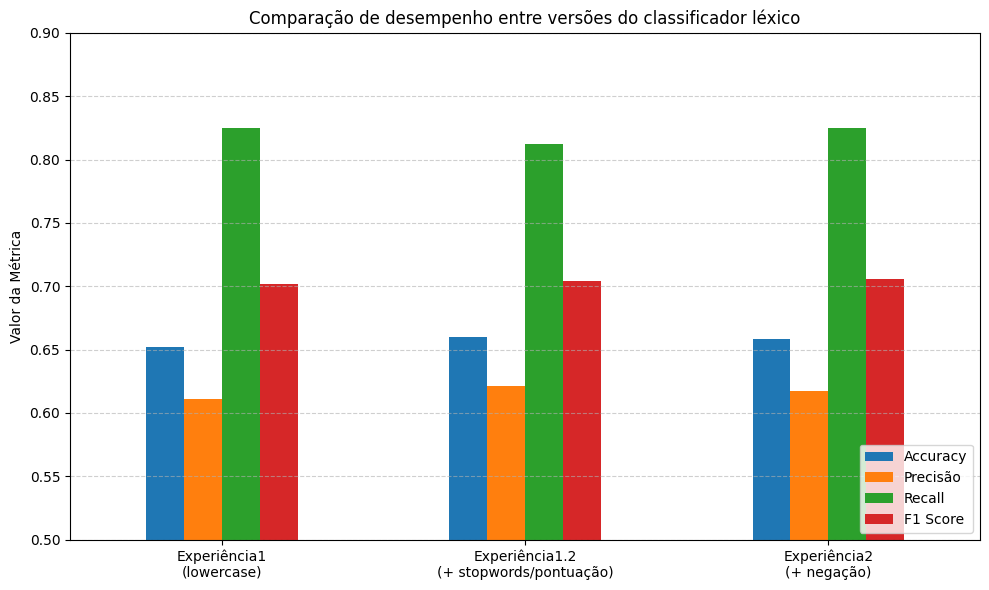

In [57]:
# Dados das experiências
experiencias = ['Experiência1\n(lowercase)', 'Experiência1.2\n(+ stopwords/pontuação)', 'Experiência2\n(+ negação)']
metricas = ['Accuracy', 'Precisão', 'Recall', 'F1 Score']
valores = [
    [0.652, 0.611, 0.825, 0.702],  # Experiência1 utilizando apenas texto em minúsculas (lowercase).
    [0.660, 0.621, 0.812, 0.704],  # Experiência1.2 adicionando técnicas básicas de pré-processamento (remoção de pontuação e de stopwords).
    [0.658, 0.617, 0.825, 0.706],  # Experiência2 para alem de todas as técnicas anteriores ainda inclui tratamento simples de negação.
]

# Criar DataFrame
df_plot = pd.DataFrame(valores, index=experiencias, columns=metricas)

# Gráfico
plt.figure(figsize=(10, 6))
df_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de desempenho entre versões do classificador léxico')
plt.ylabel('Valor da Métrica')
plt.ylim(0.5, 0.9)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 📊 Resultados das Experiências com Classificador Léxico

| Experiência                         | Accuracy | Precisão | Recall | F1 Score | Observações                                                        |
|-------------------------------------|----------|----------|--------|----------|---------------------------------------------------------------------|
| Exp. 1 - Sem negação (baseline)     | 0.652    | 0.611    | 0.825  | 0.702    | Apenas conversão para minúsculas (lowercase)                       |
| Exp. 2 - + Stopwords/Pontuação      | 0.660    | 0.621    | 0.812  | 0.704    | Adicionada remoção de stopwords e pontuação                        |
| Exp. 3 - + Tratamento de negação    | 0.658    | 0.617    | 0.825  | 0.706    | Incluído tratamento simples de negação com inversão de polaridade  |
